<a href="https://colab.research.google.com/github/Meena-27/project/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
dataset_path = '/content/drive/MyDrive/Data/'


In [4]:
import os
import cv2
import numpy as np

# After importing 'os', you can proceed with the rest of your code


In [10]:
glioma_tumor_path = os.path.join(dataset_path, 'glioma_tumor')
meningioma_tumor_path = os.path.join(dataset_path, 'meningioma_tumor')
normal_tumor_path = os.path.join(dataset_path, 'normal')
pituitary_tumor_path = os.path.join(dataset_path, 'pituitary_tumor')


In [11]:
import os

# List files in each subfolder
glioma_files = os.listdir(glioma_tumor_path)
meningioma_files = os.listdir(meningioma_tumor_path)
normal_files = os.listdir(normal_tumor_path)
pituitary_files = os.listdir(pituitary_tumor_path)

# Print the list of files
print(f'Glioma files: {glioma_files}')
print(f'Meningioma files: {meningioma_files}')
print(f'Normal files: {normal_files}')
print(f'Pituitary files: {pituitary_files}')


Glioma files: ['G_423.jpg', 'G_316.jpg', 'G_324.jpg', 'G_330.jpg', 'G_735.jpg', 'G_430.jpg', 'G_386.jpg', 'G_458.jpg', 'G_353.jpg', 'G_835.jpg', 'G_79.jpg', 'G_20.jpg', 'G_884.jpg', 'G_420.jpg', 'G_134.jpg', 'G_812.jpg', 'G_889.jpg', 'G_692.jpg', 'G_478.jpg', 'G_164.jpg', 'G_500.jpg', 'G_498.jpg', 'G_367.jpg', 'G_510.jpg', 'G_463.jpg', 'G_675.jpg', 'G_589.jpg', 'G_23.jpg', 'G_557.jpg', 'G_779.jpg', 'G_304.jpg', 'G_485.jpg', 'G_771.jpg', 'G_481.jpg', 'G_344.jpg', 'G_334.jpg', 'G_12.jpg', 'G_742.jpg', 'G_574.jpg', 'G_309.jpg', 'G_453.jpg', 'G_814.jpg', 'G_521.jpg', 'G_806.jpg', 'G_805.jpg', 'G_74.jpg', 'G_193.jpg', 'G_31.jpg', 'G_877.jpg', 'G_206.jpg', 'G_414.jpg', 'G_148.jpg', 'G_62.jpg', 'G_178.jpg', 'G_34.jpg', 'G_442.jpg', 'G_829.jpg', 'G_502.jpg', 'G_784.jpg', 'G_145.jpg', 'G_468.jpg', 'G_581.jpg', 'G_382.jpg', 'G_746.jpg', 'G_374.jpg', 'G_800.jpg', 'G_269.jpg', 'G_228.jpg', 'G_81.jpg', 'G_615.jpg', 'G_619.jpg', 'G_275.jpg', 'G_141.jpg', 'G_114.jpg', 'G_68.jpg', 'G_50.jpg', 'G_272.j

In [12]:
# Count number of images in each category
glioma_count = len(os.listdir(glioma_tumor_path))
meningioma_count = len(os.listdir(meningioma_tumor_path))
normal_count = len(os.listdir(normal_tumor_path))
pituitary_count = len(os.listdir(pituitary_tumor_path))

# Calculate total images
total_images = glioma_count + meningioma_count + normal_count + pituitary_count

# Print the counts
print(f'Glioma Tumor Images: {glioma_count}')
print(f'Meningioma Tumor Images: {meningioma_count}')
print(f'Normal Tumor Images: {normal_count}')
print(f'Pituitary Tumor Images: {pituitary_count}')
print(f'Total Images: {total_images}')


Glioma Tumor Images: 901
Meningioma Tumor Images: 913
Normal Tumor Images: 438
Pituitary Tumor Images: 844
Total Images: 3096


In [13]:
import os
import pandas as pd
import numpy as np


In [14]:
# Create a dictionary with the class names and the corresponding image counts
data_summary = {
    'Class': ['Glioma Tumor', 'Meningioma Tumor', 'Normal', 'Pituitary Tumor'],
    'Number of Images': [glioma_count, meningioma_count, normal_count, pituitary_count]
}

# Create a DataFrame
df_summary = pd.DataFrame(data_summary)

# Display the summary
print("\nDataset Summary:")
print(df_summary)



Dataset Summary:
              Class  Number of Images
0      Glioma Tumor               901
1  Meningioma Tumor               913
2            Normal               438
3   Pituitary Tumor               844


In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split


In [16]:
import os
import cv2

# Function to load images and resize them (optional)
def load_images_from_directory(directory_path, image_size=(256, 256)):
    images = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):  # Add more extensions if needed
            image_path = os.path.join(directory_path, file_name)
            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, image_size)
            images.append(img_resized)
    return images

# Load images from each class
glioma_images = load_images_from_directory(glioma_tumor_path)
meningioma_images = load_images_from_directory(meningioma_tumor_path)
normal_images = load_images_from_directory(normal_tumor_path)
pituitary_images = load_images_from_directory(pituitary_tumor_path)

# Now, the lists glioma_images, meningioma_images, normal_images, and pituitary_images are populated


In [17]:
# Combine all images and labels
X = glioma_images + meningioma_images + normal_images + pituitary_images
y = ['glioma'] * len(glioma_images) + ['meningioma'] * len(meningioma_images) + \
    ['normal'] * len(normal_images) + ['pituitary'] * len(pituitary_images)


In [18]:
print(f'Number of Glioma images: {len(glioma_images)}')
print(f'Number of Meningioma images: {len(meningioma_images)}')
print(f'Number of Normal images: {len(normal_images)}')
print(f'Number of Pituitary images: {len(pituitary_images)}')
print(f'Total Number of images: {len(X)}')


Number of Glioma images: 901
Number of Meningioma images: 913
Number of Normal images: 438
Number of Pituitary images: 844
Total Number of images: 3096


In [19]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
IMG_SIZE = (256, 256)  # Resize images to 256x256
glioma_tumor_path = '/content/drive/MyDrive/Data/glioma_tumor'
meningioma_tumor_path = '/content/drive/MyDrive/Data/meningioma_tumor'
normal_tumor_path = '/content/drive/MyDrive/Data/normal'
pituitary_tumor_path = '/content/drive/MyDrive/Data/pituitary_tumor'

In [21]:
def load_images_from_directory(directory_path, image_size=IMG_SIZE):
    images = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            image_path = os.path.join(directory_path, file_name)
            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, image_size)
            images.append(img_resized)
    return images

In [22]:
glioma_images = load_images_from_directory(glioma_tumor_path)
meningioma_images = load_images_from_directory(meningioma_tumor_path)
normal_images = load_images_from_directory(normal_tumor_path)
pituitary_images = load_images_from_directory(pituitary_tumor_path)

In [23]:
X = glioma_images + meningioma_images + normal_images + pituitary_images
y = ['glioma'] * len(glioma_images) + ['meningioma'] * len(meningioma_images) + \
    ['normal'] * len(normal_images) + ['pituitary'] * len(pituitary_images)

In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
X = X / 255.0  # Scaling pixels to the range [0, 1]


In [26]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=4)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [29]:
valid_datagen = ImageDataGenerator(rescale=1./255)


In [30]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
valid_generator = valid_datagen.flow(X_test, y_test, batch_size=32)


In [31]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 categories (glioma, meningioma, normal, pituitary)
])

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=5,  # Reduced epochs to 5
    validation_data=valid_generator,
    callbacks=[early_stop]
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
68/68 [==============================] - 244s 4s/step - loss: 1.4413 - accuracy: 0.2829 - val_loss: 1.3757 - val_accuracy: 0.3100
Epoch 2/5
68/68 [==============================] - 241s 4s/step - loss: 1.3614 - accuracy: 0.3060 - val_loss: 1.3719 - val_accuracy: 0.3100
Epoch 3/5
68/68 [==============================] - 241s 4s/step - loss: 1.3063 - accuracy: 0.3563 - val_loss: 1.3675 - val_accuracy: 0.3100
Epoch 4/5
68/68 [==============================] - 241s 4s/step - loss: 1.2495 - accuracy: 0.3973 - val_loss: 1.4548 - val_accuracy: 0.3100
Epoch 5/5
30/30 [==============================] - 22s 732ms/step - loss: 1.1092 - accuracy: 0.5328
Test accuracy: 0.5328310132026672


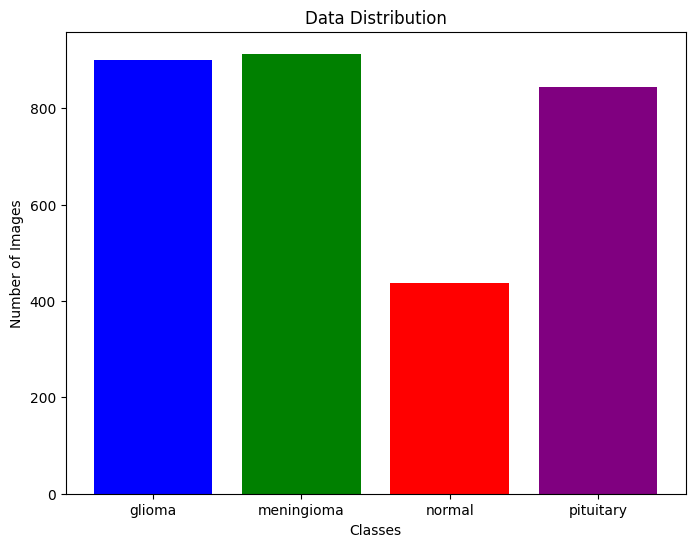

In [33]:
import matplotlib.pyplot as plt

# Count the number of images in each class
class_labels = ['glioma', 'meningioma', 'normal', 'pituitary']
class_counts = [len(glioma_images), len(meningioma_images), len(normal_images), len(pituitary_images)]

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Data Distribution')
plt.show()


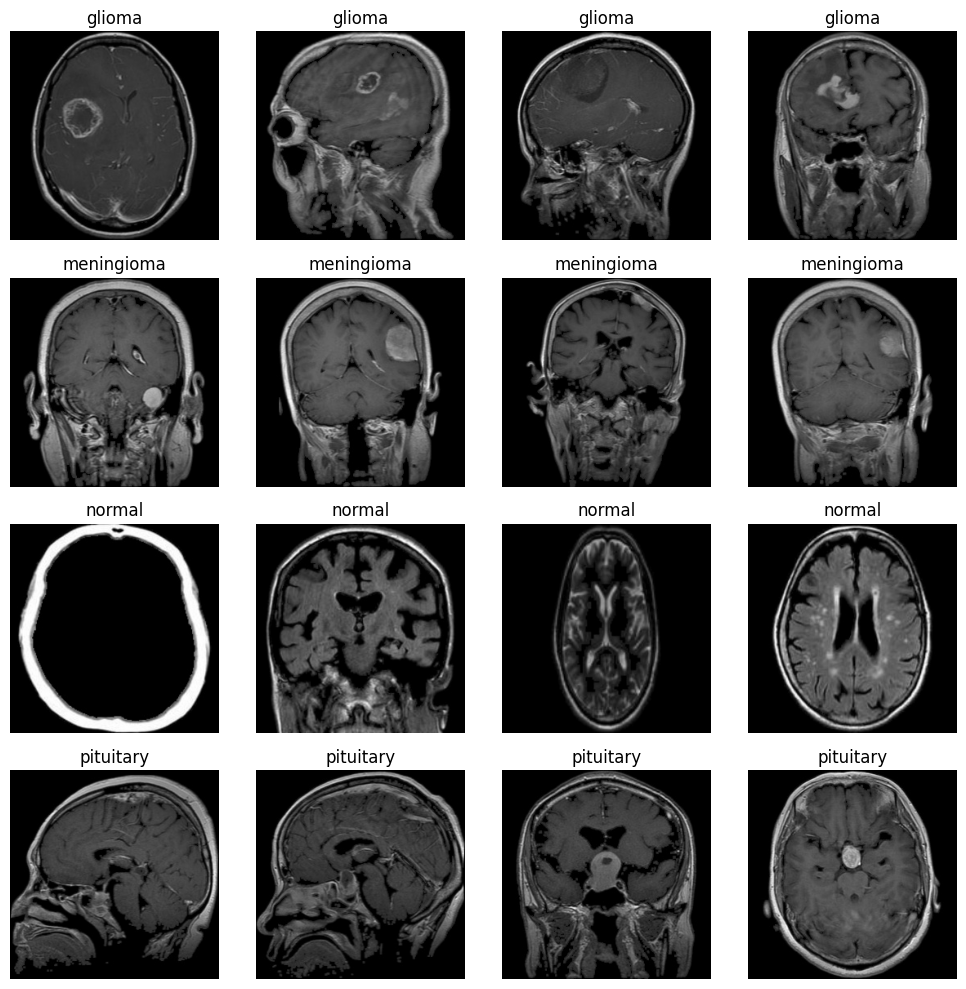

In [37]:
import matplotlib.pyplot as plt

def display_sample_images(images, labels, num_samples=4):
    plt.figure(figsize=(10, 10))

    for i, class_label in enumerate(class_labels):
        # Select images for the current class
        class_images = [img for img, lbl in zip(images, labels) if lbl == i]  # Use 'i' instead of class_label for matching

        # Check if there are enough images for the class
        num_images_in_class = len(class_images)
        num_samples_to_display = min(num_samples, num_images_in_class)

        # Check if there are images to display
        if num_samples_to_display > 0:  # Proceed only if there are images
            for j in range(num_samples_to_display):
                plt.subplot(len(class_labels), num_samples, i * num_samples + j + 1)
                plt.imshow(class_images[j])
                plt.axis('off')
                plt.title(class_label)

    plt.tight_layout()
    plt.show()

# Display sample images with checks and logging
display_sample_images(X, np.argmax(y, axis=1), num_samples=4)



30/30 [==============================] - 22s 731ms/step


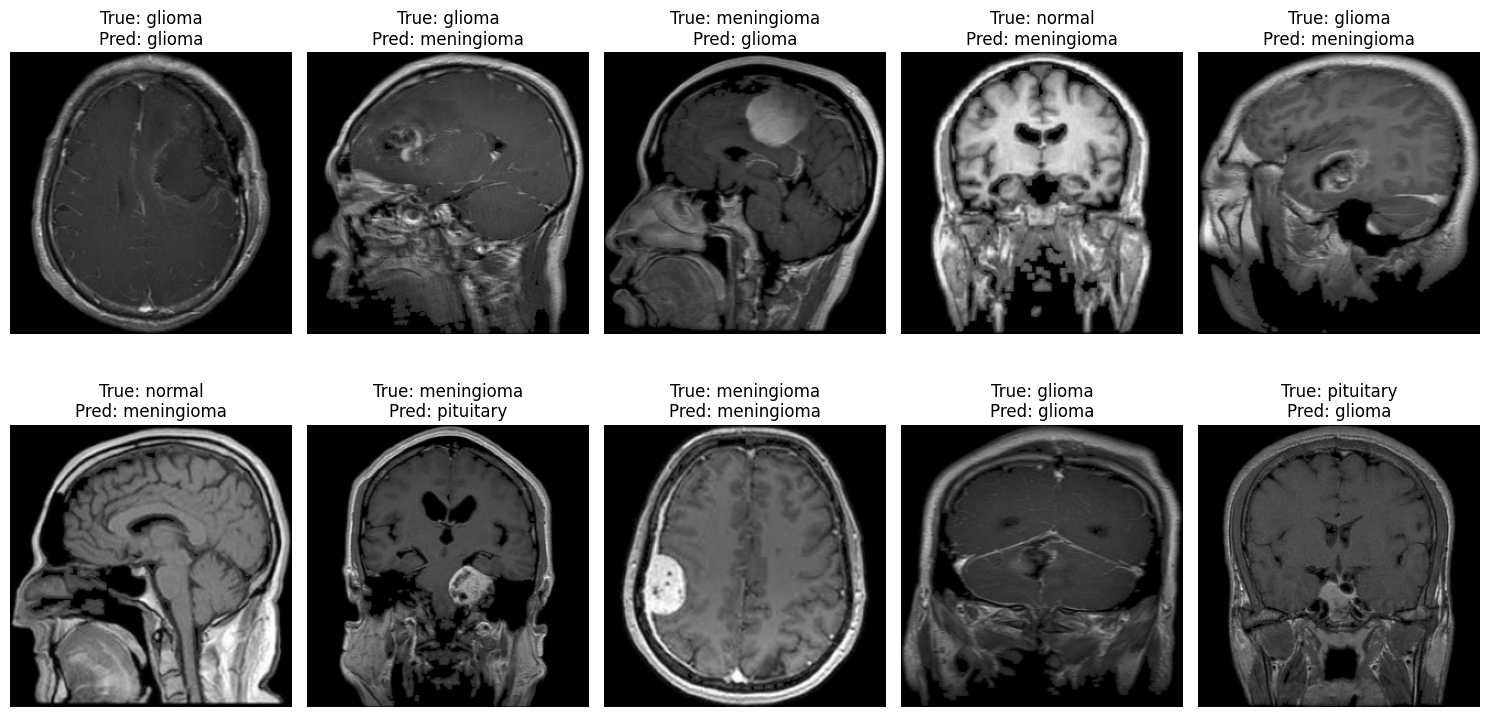

In [36]:
# Visualize predictions
import random

# Predict labels for a subset of test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Randomly select images for visualization
indices = random.sample(range(len(X_test)), 10)
plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    plt.title(f"True: {class_labels[true_labels[idx]]}\nPred: {class_labels[predicted_labels[idx]]}")
plt.tight_layout()
plt.show()


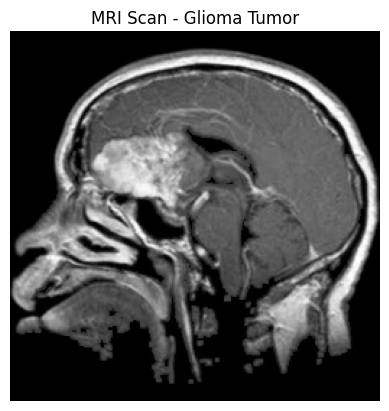

In [42]:
import cv2
import matplotlib.pyplot as plt

# Correct path to your image
image_path = '/content/drive/MyDrive/Data/glioma_tumor/G_1.jpg'  # Replace with actual image filename

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title("MRI Scan - Glioma Tumor")
plt.show()


In [48]:
# Assuming 'model' is your trained model
model.save('/content/drive/MyDrive/your_model.h5')  # Replace with your desired path


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
from keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/your_model.h5')  # Provide the correct path to your saved model


Saving N_9.jpg to N_9 (1).jpg
1/1 [==============================] - 0s 86ms/step


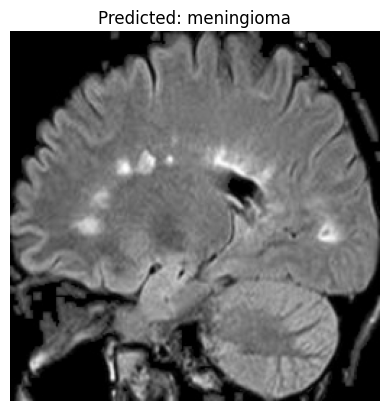

Prediction probabilities: [[0.01081469 0.61208427 0.37479144 0.00230962]]


In [51]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to classify the new image
def classify_new_image(model, image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(256, 256))  # Adjust size according to your model's input size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Predict the class of the new image
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability

    class_names = ['glioma', 'meningioma', 'normal', 'pituitary']  # Make sure this matches the class labels used during training
    return class_names[predicted_class], prediction

# Upload a new image
uploaded = files.upload()

# Get the name of the uploaded file
image_path = next(iter(uploaded))  # Get the name of the uploaded file

# Assuming you have already trained your model, load it (replace 'your_model.h5' with the correct model filename)
from keras.models import load_model
model = load_model('/content/drive/MyDrive/your_model.h5')  # Adjust the path to your model

# Classify the new image
predicted_class, prediction = classify_new_image(model, image_path)

# Show the image and the prediction
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

# Print prediction probabilities
print(f'Prediction probabilities: {prediction}')


In [53]:
# Show the predicted class and the probability of prediction
class_names = ['Glioma', 'Meningioma', 'Normal', 'Pituitary']

# Print the prediction probabilities
print(f"Prediction probabilities: {prediction}")

# Determine the predicted class based on the highest probability
predicted_class = class_names[np.argmax(prediction)]

# Display the predicted class with the highest probability
print(f"Predicted class: {predicted_class} (with probability {np.max(prediction) * 100:.2f}%)")


Prediction probabilities: [[0.01081469 0.61208427 0.37479144 0.00230962]]
Predicted class: Meningioma (with probability 61.21%)
